# This is a dataset from a hospital in Cleveland.

# Implementing Logistical Regression to Predict Heart Disease, and determining the precursors to heart disease.

# Gathering medical records on patients after exercises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Heart Disease UCI.xlsx')

In [3]:
df = pd.DataFrame(data)

In [4]:
hlabels = ['Non-Existent', 'Existent']
htitle = 'Heart Disease Status'
slopelabels = ['Upsloping\n(Better Heart Rate With Excercise)',
               'Flatsloping\n(Minimal Change)',
               'Downslopins\n(Signs of Unhealthy Heart)']
thallabels = ['1,3: Normal',
              '6: Fixed Defect\nUsed to be Defect But Okay Now',
              '7: Reversable Defect\nNo Proper Blood Movement When Excercising']
cptlabels = ['0: Typical Angina\nChest Pain Related Decrease\nBlood Supply to the Heart',
            '1: Atypical Angina\nChest Pain Not Related to Heart',
            '2: Non-anginal Pain\nTypically Esophageal Spasms\n(Non Heart Related)',
            '3: Asymptomatic\nChest Pain Not Showing Signs of Disease']

In [5]:
df['thal'].replace(0,1,inplace = True)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.320132,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.592299,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


__From Strongest to Weakest Correlations, with Target, in Respective Order.__

__Positive Correlations__

__1.) Chest Pain Type: 0.43__

__2.) Maximum Hart Rate Achieved: 0.42__

__3.) The Slope of the Peak Exercise ST Segment: 0.35__

__Negative Correlations__

__1.) Exercise Induced Angina (1 = Yes; 0 = No): -0.44__

__2.) ST Depression Induced by Exercise Relative to Rest: -0.43__

__3.) Number of Major Vessels (0-3) Colored by Flourosopy: -0.39__

__4.) 3 = Normal; 6 = Fixed Defect; 7 = Reversable Defect: -0.34__

__5.) Sex: -0.28__

__6.) Age: -0.23__

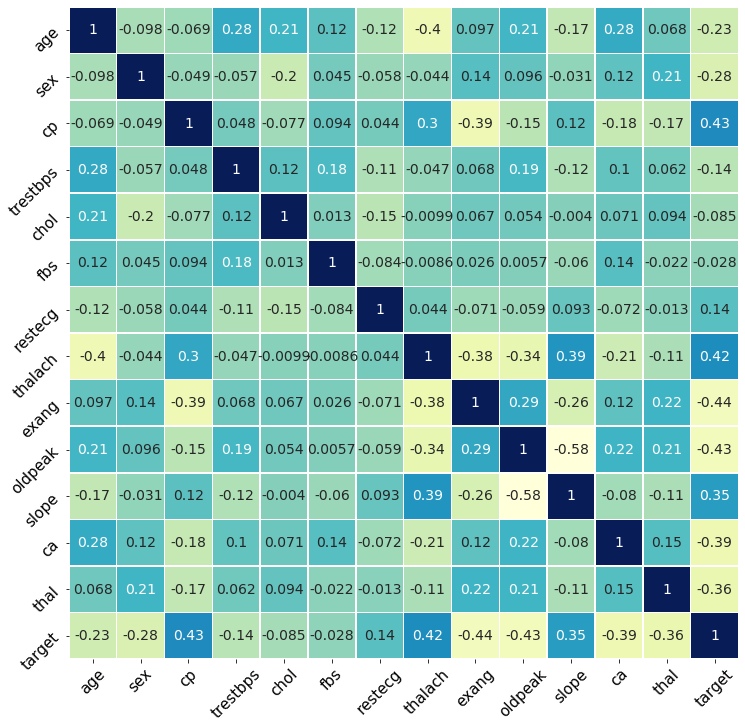

In [9]:
plt.figure(figsize= (12,12))
x = sns.heatmap(df.corr(), linecolor = 'white', linewidths = 0.5, annot = True,
                cbar = False, annot_kws={"size": 14}, cmap="YlGnBu")
x.set_ylim(sorted(x.get_xlim(), reverse=True))
plt.xticks(size = 15, rotation = 45)
plt.yticks(size = 15, rotation = 45)
plt.show()

__This dataset contains more records of patients diagnosed with heart disease, than without.__

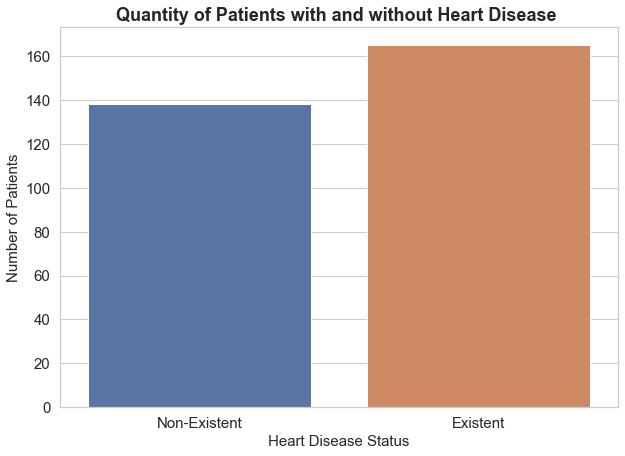

In [10]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,7))
x = sns.countplot(df['target'])
plt.title('Quantity of Patients with and without Heart Disease ', size = 18, weight = 'bold')
plt.xlabel(htitle, size = 15)
x.set_xticklabels(hlabels)
plt.ylabel('Number of Patients', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

__Correlation for Gender is -0.28__

__The dataset could be showing a negative correlation, since a greater percentage within females, than males, have been diagnosed with heart disease.__

__The visualization clearly shows that there is a greater percentage of males than females, within the dataset.__

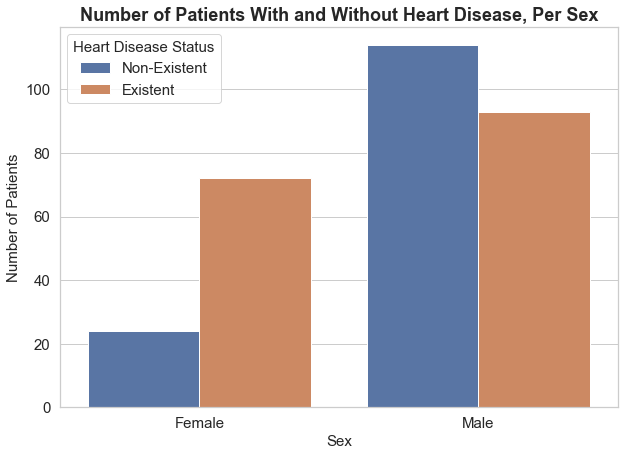

In [11]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'sex', hue = 'target').set_xticklabels(labels = ['Female', 'Male'], size = 15)
plt.title('Number of Patients With and Without Heart Disease, Per Sex', size = 18, weight = 'bold')
plt.xlabel('Sex', size = 15)
plt.ylabel('Number of Patients', size = 15)
plt.yticks(size = 15)
plt.legend(labels = hlabels, fontsize = 15, loc = 'best', title = htitle, title_fontsize = 15)
plt.show()

__The correlation of Maximum Hart Rate Achieved is 0.42.__

__This is a strong correlation, which may indicate, that a higher achieved heart rate, can indicate a precursor to heart disease.__

__The median achieved heart rate is approximately 145, for a healthy patient.__

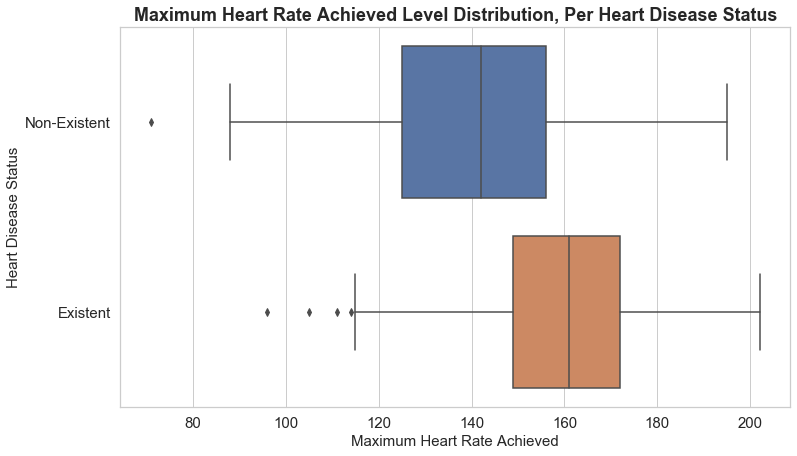

In [12]:
plt.figure(figsize = (12,7))
sns.boxplot(data = df, x = 'thalach', y = 'target', orient = "h").set_yticklabels(labels = hlabels)
plt.xlabel('Maximum Heart Rate Achieved', size = 15)
plt.ylabel(htitle, size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title(f'Maximum Heart Rate Achieved Level Distribution, Per {htitle}', size = 18, weight = 'bold')
plt.show()

__The correlation for Exercise Induced Angina is -0.44.__

__This makes sense since the majority of patients, diagnosed with heart disease, had an absense of angina.__

__The absense of induced angina after exercise, could be another precursor to heart disease.__

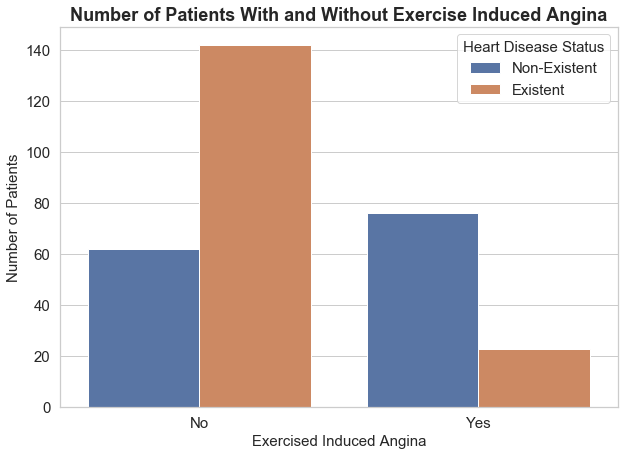

In [13]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'exang', hue = 'target').set_xticklabels(labels = ['No', 'Yes'])
plt.title('Number of Patients With and Without Exercise Induced Angina', size = 18, weight = 'bold')
plt.xlabel('Exercised Induced Angina', size = 15)
plt.ylabel('Number of Patients', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(labels = hlabels, fontsize = 15, title = htitle, title_fontsize = 15)
plt.show()

__The correlation for the slope of the peak exercise ST Segment is 0.35.__

__Experiencing Downsloping after exercise, could be also another precursor for heart disease.__

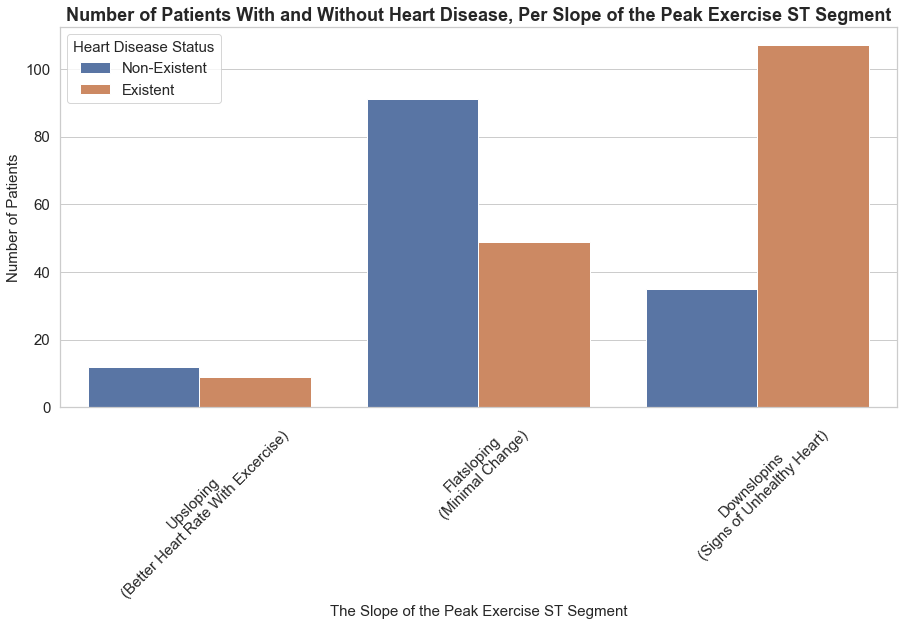

In [14]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'slope', hue = 'target').set_xticklabels(labels = slopelabels)
plt.xlabel('The Slope of the Peak Exercise ST Segment', size = 15)
plt.ylabel('Number of Patients', size = 15)
plt.xticks(rotation = 45, size = 15)
plt.yticks(size = 15)
plt.title('Number of Patients With and Without Heart Disease, Per Slope of the Peak Exercise ST Segment',
          size = 18, weight = 'bold')
plt.legend(labels = hlabels, fontsize = 15, title = htitle, title_fontsize = 15)
plt.show()

__This Distribution plot displays that patients below the age of 54, are more at risk for heart disease than patients from age 55 and more.__

__This would explain the negative correlation of -0.23.__

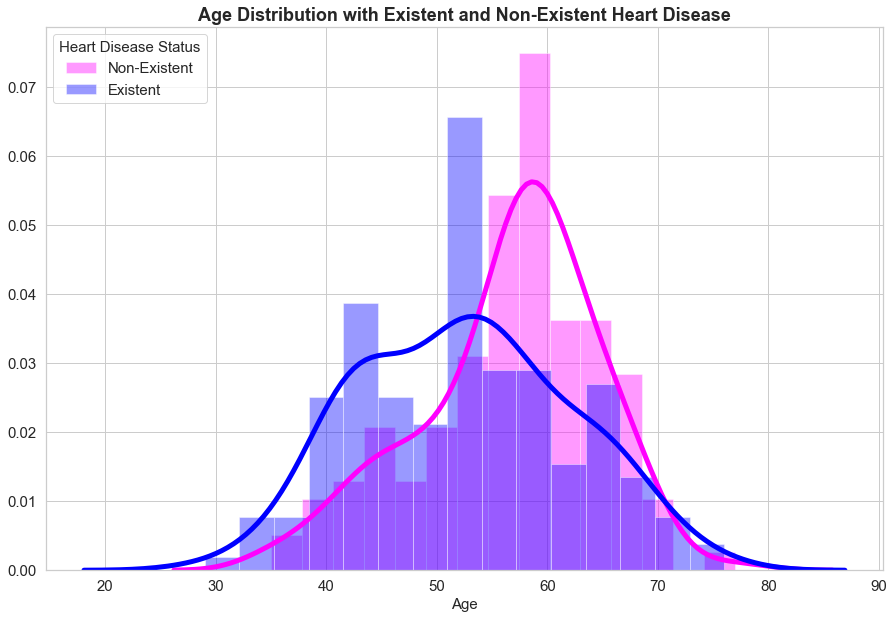

In [15]:
df1 = df.where(df['target'] == 0).dropna()
df2 = df.where(df['target'] == 1).dropna()

plt.figure(figsize = (15,10))
ax1 = sns.distplot(df1['age'], kde = True, color = 'magenta', bins = 15, kde_kws = {"linewidth": 5})
ax2 = sns.distplot(df2['age'], kde = True, color = 'blue', ax = ax1, bins = 15, kde_kws = {"linewidth": 5})
plt.title('Age Distribution with Existent and Non-Existent Heart Disease', size = 18, weight = 'bold')
plt.xlabel('Age', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(labels = hlabels, fontsize = 15, title = htitle, title_fontsize = 15, loc = 'upper left')
plt.show()

__Thalium Stress Level Correlation is -0.34.__

__Most of the patients diagnosed with heart disease, had a Thalium Stress result of 6.__

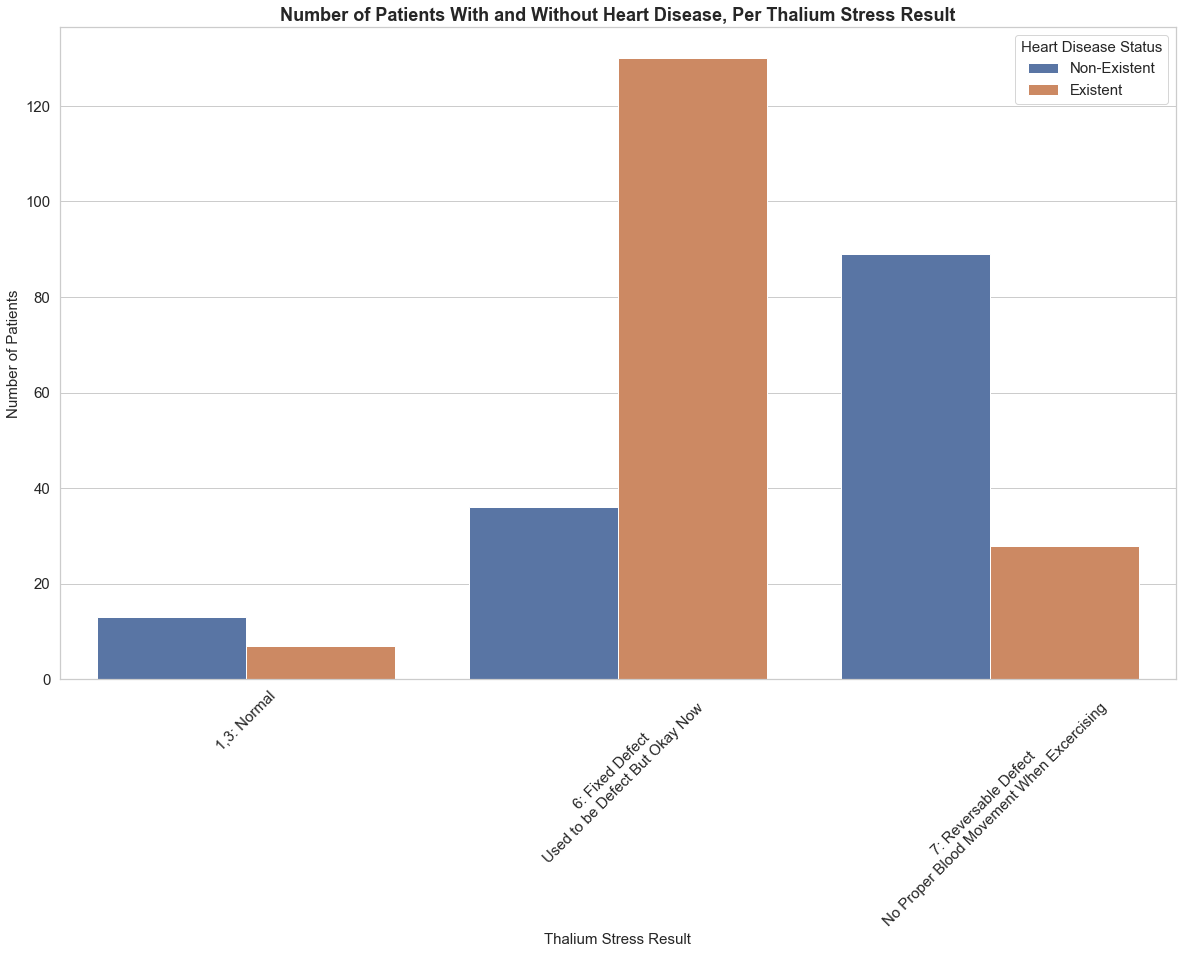

In [16]:
plt.figure(figsize = (20,12))
x = sns.countplot(data = df, x = 'thal', hue = 'target')
x.set_xticklabels(labels = thallabels)
plt.xticks(size = 15, rotation = 45)
plt.yticks(size = 15)
plt.xlabel('Thalium Stress Result', size = 15)
plt.ylabel('Number of Patients', size = 15)
plt.title('Number of Patients With and Without Heart Disease, Per Thalium Stress Result', size = 18, weight = 'bold')
plt.legend(labels = hlabels, fontsize = 15, title = htitle, title_fontsize = 15)
plt.show()

__The correlation for Number of Major Vessels is -0.39.__

__Colored vessel means the doctor can see the blood passing through__

__The more blood movement the better (no clots)__

__The less number of major vessels, the greater probability of heart disease and blood clots.__

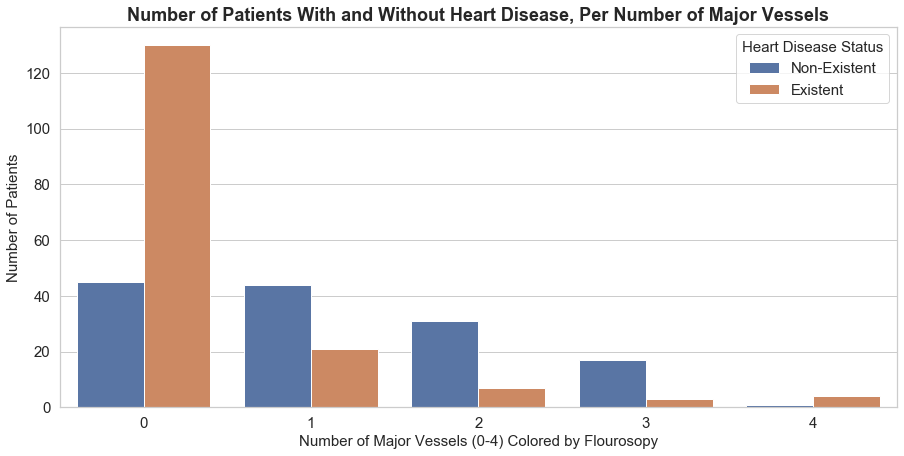

In [17]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'ca', hue = 'target')
plt.legend(labels = hlabels, title = 'Heart Disease Status', fontsize = 15, title_fontsize = 15)
plt.xlabel('Number of Major Vessels (0-4) Colored by Flourosopy', size = 15)
plt.ylabel('Number of Patients', size = 15)
plt.title('Number of Patients With and Without Heart Disease, Per Number of Major Vessels', size = 18, weight = 'bold')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

__The correlation with Chest Pain Type is 0.43.__

__Patients with the typical angina, experience a healthy balance of blood supply to the heart. A healthy patient will have the typical angina.__

__Most of the patients diagnosed with heart disease, experienced chest pain.__

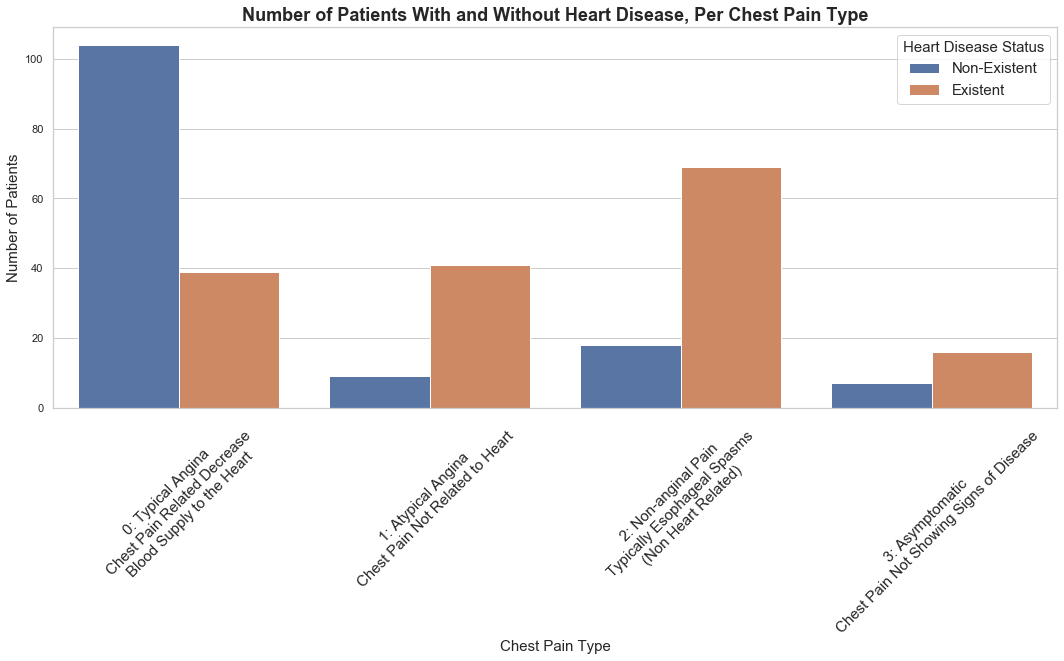

In [45]:
plt.figure(figsize = (18,7))
sns.countplot(data = df, x = 'cp', hue = 'target').set_xticklabels(labels = cptlabels)
plt.legend(labels = hlabels, title = 'Heart Disease Status', fontsize = 15, title_fontsize = 15)
plt.title('Number of Patients With and Without Heart Disease, Per Chest Pain Type', size = 18, weight = 'bold')
plt.ylabel('Number of Patients', size = 15)
plt.xticks(rotation = 45, size = 15)
plt.xlabel('Chest Pain Type', size = 15)
plt.show()

__The correlation with ST Depression Induced by Exercise Relative to Rest is -0.43.__

__Looks at stress of heart during excercise__

__An unhealthy heart will have a lower level of ST Depression induced by exercise relative to rest. The healthy heart will have a higher level.__

__Looking at the violin plot for the patients diagnosed with heart disease, most of the density is near to the value zero. This will explain the negative correlation.__

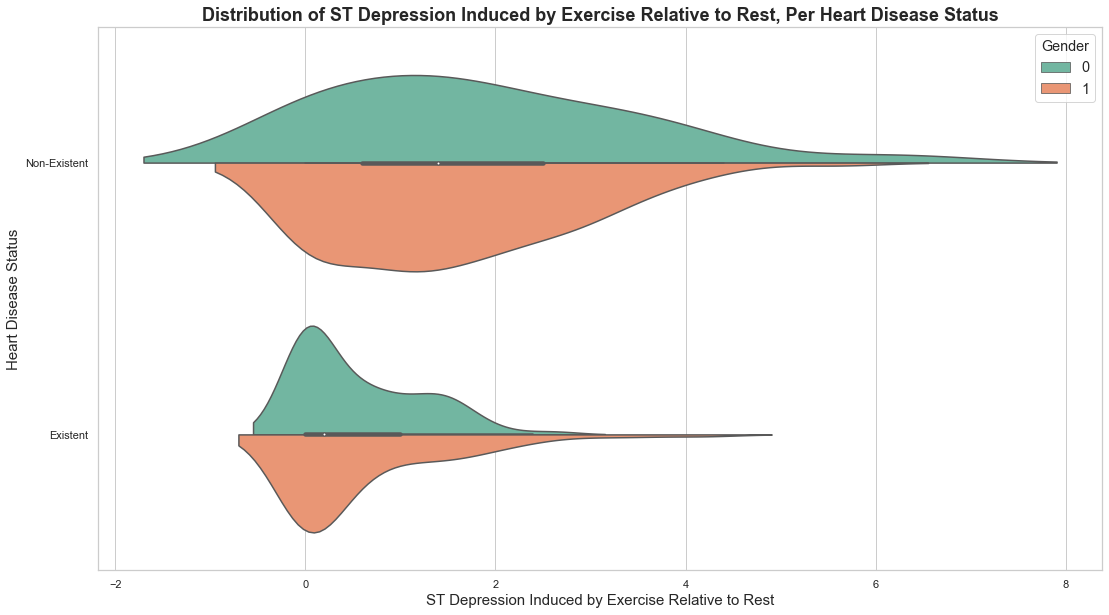

In [48]:
plt.figure(figsize = (18,10))
sns.violinplot(data = df, x = 'oldpeak', y = 'target', orient = 'h', hue = 'sex',
               split = True, palette = 'Set2').set_yticklabels(labels = hlabels)
plt.legend(title = 'Gender', fontsize = "large", title_fontsize = "large")
plt.title('Distribution of ST Depression Induced by Exercise Relative to Rest, Per Heart Disease Status',
          size = 18, weight = 'bold')
plt.ylabel(htitle, size = 15)
plt.xlabel('ST Depression Induced by Exercise Relative to Rest', size = 15)

plt.show()

__Split and Train Data__

In [20]:
x = df.drop('target', axis = 1)

In [21]:
y = df['target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 101)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression()

In [26]:
logmodel.fit(x_train, y_train)

C:\Users\dmate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

__Calculating Predictions and Results__

In [27]:
predictions = logmodel.predict(x_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        60
           1       0.80      0.92      0.86        62

    accuracy                           0.84       122
   macro avg       0.85      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, predictions)

array([[46, 14],
       [ 5, 57]], dtype=int64)